In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# READ CSV File

In [2]:
df=pd.read_csv('data.csv') #read the csv file

In [3]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [4]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


# Replacing NAN values with mean

In [5]:
df['Age'].isna().sum() #To Check if there is any null values in Age Col

1

In [6]:
df['Salary'].isna().sum() #To Check if there is any null values in Salary Col

1

In [7]:
df['Age'] = df['Age'].replace(np.nan, df['Age'].mean())

In [8]:
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.0,No
1,Spain,27.000000,48000.0,Yes
2,Germany,30.000000,54000.0,No
3,Spain,38.000000,61000.0,No
4,Germany,40.000000,NaN,Yes
5,France,35.000000,58000.0,Yes
6,Spain,38.777778,52000.0,No
7,France,48.000000,79000.0,Yes
8,Germany,50.000000,83000.0,No
9,France,37.000000,67000.0,Yes


In [9]:
df['Salary'] = df['Salary'].replace(np.nan, df['Salary'].mean())

In [10]:
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


# Label Encoding

In [11]:
df['Country'].value_counts()

France     4
Spain      3
Germany    3
Name: Country, dtype: int64

In [12]:
df['Purchased'].value_counts()

No     5
Yes    5
Name: Purchased, dtype: int64

In [13]:
label_encoder=LabelEncoder()

In [14]:
labels=label_encoder.fit_transform(df.Country)

In [15]:
df["Country_Label"] = labels

In [16]:
purLab = label_encoder.fit_transform(df.Purchased)

In [17]:
df["Purchased_Label"] = purLab

In [18]:
df

,Country,Age,Salary,Purchased,Country_Label,Purchased_Label
0,France,44.000000,72000.000000,No,0,0
1,Spain,27.000000,48000.000000,Yes,2,1
2,Germany,30.000000,54000.000000,No,1,0
3,Spain,38.000000,61000.000000,No,2,0
4,Germany,40.000000,63777.777778,Yes,1,1
5,France,35.000000,58000.000000,Yes,0,1
6,Spain,38.777778,52000.000000,No,2,0
7,France,48.000000,79000.000000,Yes,0,1
8,Germany,50.000000,83000.000000,No,1,0
9,France,37.000000,67000.000000,Yes,0,1


In [19]:
df['Country_Label'].value_counts()

0    4
2    3
1    3
Name: Country_Label, dtype: int64

In [20]:
df['Purchased_Label'].value_counts()

0    5
1    5
Name: Purchased_Label, dtype: int64

# Outliers detections

(array([1., 2., 1., 1., 1., 1., 1., 0., 1., 1.]),
 array([48000., 51500., 55000., 58500., 62000., 65500., 69000., 72500.,
        76000., 79500., 83000.]),
 <BarContainer object of 10 artists>)

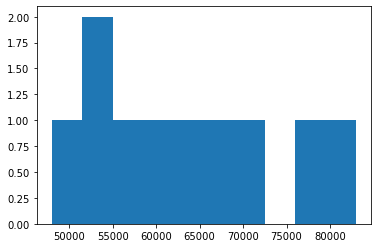

In [21]:
plt.hist(df['Salary'])

C:\Users\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

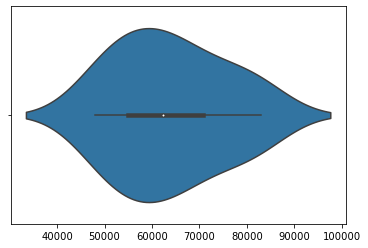

In [22]:
sns.violinplot(np.array(df['Salary']))

In [23]:
lowerLimit_sal=df['Salary'].quantile(0.25)
print(lowerLimit_sal)
df[df['Salary']<lowerLimit_sal]

55000.0


,Country,Age,Salary,Purchased,Country_Label,Purchased_Label
1,Spain,27.000000,48000.0,Yes,2,1
2,Germany,30.000000,54000.0,No,1,0
6,Spain,38.777778,52000.0,No,2,0


In [24]:
higherLimit_sal=df['Salary'].quantile(0.75)
print(higherLimit_sal)
df[df['Salary']>higherLimit_sal]

70750.0


,Country,Age,Salary,Purchased,Country_Label,Purchased_Label
0,France,44.0,72000.0,No,0,0
7,France,48.0,79000.0,Yes,0,1
8,Germany,50.0,83000.0,No,1,0


In [25]:
df_sal= df[(df['Salary']>lowerLimit_sal)&(df['Salary']<higherLimit_sal)]
df_sal

,Country,Age,Salary,Purchased,Country_Label,Purchased_Label
3,Spain,38.0,61000.000000,No,2,0
4,Germany,40.0,63777.777778,Yes,1,1
5,France,35.0,58000.000000,Yes,0,1
9,France,37.0,67000.000000,Yes,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1e6f40a47c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6f40a4e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6f40a4550>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6f40b2340>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6f40b2610>],
 'means': []}

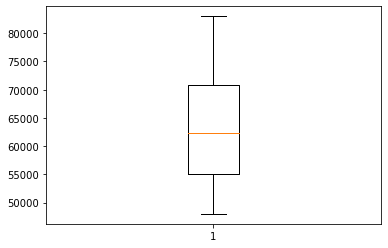

In [26]:
plt.boxplot(df['Salary'])

(array([1., 1., 0., 1., 2., 2., 0., 1., 0., 2.]),
 array([27. , 29.3, 31.6, 33.9, 36.2, 38.5, 40.8, 43.1, 45.4, 47.7, 50. ]),
 <BarContainer object of 10 artists>)

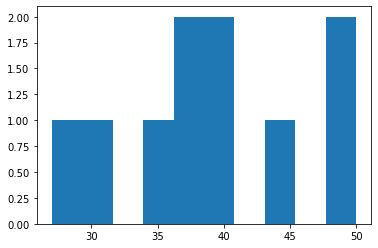

In [27]:
plt.hist(df['Age'])

C:\Users\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

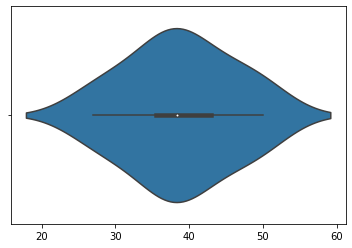

In [28]:
sns.violinplot(np.array(df['Age']))

In [29]:
lowerLimit_age=df['Age'].quantile(0.25)
print(lowerLimit_age)
df[df['Age']<lowerLimit_age]

35.5


,Country,Age,Salary,Purchased,Country_Label,Purchased_Label
1,Spain,27.0,48000.0,Yes,2,1
2,Germany,30.0,54000.0,No,1,0
5,France,35.0,58000.0,Yes,0,1


In [30]:
higherLimit_age=df['Age'].quantile(0.75)
print(higherLimit_age)
df[df['Age']>higherLimit_age]

43.0


,Country,Age,Salary,Purchased,Country_Label,Purchased_Label
0,France,44.0,72000.0,No,0,0
7,France,48.0,79000.0,Yes,0,1
8,Germany,50.0,83000.0,No,1,0


In [31]:
df_age= df[(df['Age']>lowerLimit_age)&(df['Age']<higherLimit_age)]
df_age

,Country,Age,Salary,Purchased,Country_Label,Purchased_Label
3,Spain,38.000000,61000.000000,No,2,0
4,Germany,40.000000,63777.777778,Yes,1,1
6,Spain,38.777778,52000.000000,No,2,0
9,France,37.000000,67000.000000,Yes,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1e6f41e5190>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6f41e5730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6f41d6e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6f41e5cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6f41e5fa0>],
 'means': []}

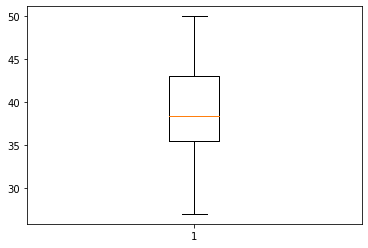

In [32]:
plt.boxplot(df['Age'])